This is for Linear Regression Analysis
#### References:
Three-part pandas tutorial by Greg Reda.
Introduction to linear regression by Rober Nau (Duke).
An introduction to Statistical Learning by Hastie and Tibshirani (Stanford).

#### For Cross-Validation:
scikit-learn documentation: Cross-validation, Model evaluation
Machine Learning Mastery: An Introduction to Feature Selection
Harvard CS109: Cross-Validation: The Right and Wrong Way

In [7]:
import pandas as pd
import seaborn as sns
import numpy as np
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [8]:
data = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)

In [9]:
data.head()
data.tail()
data.shape

(200, 4)

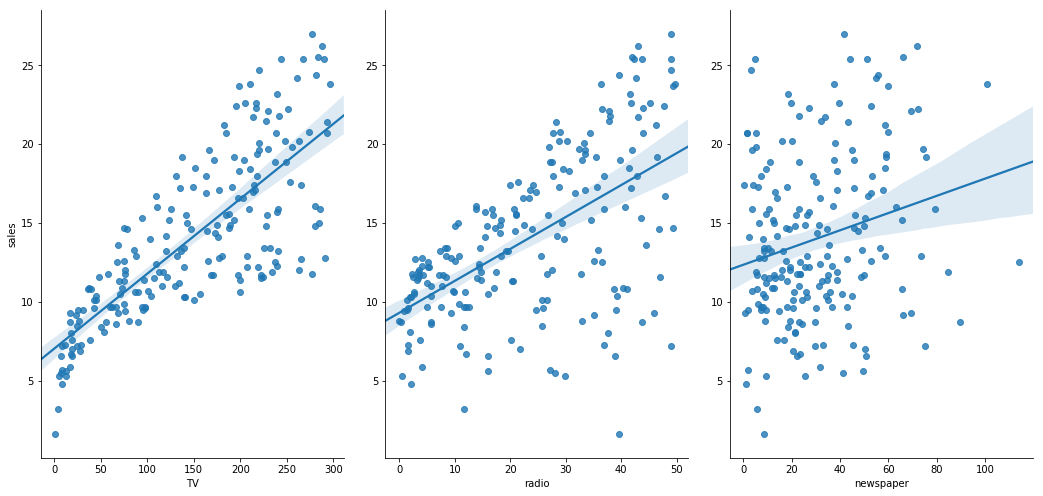

In [10]:
%matplotlib inline
sns.pairplot(data, x_vars=['TV', 'radio', 'newspaper'], y_vars='sales', size=7, aspect=0.7, kind='reg')

In [11]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
# which is equivalent to X = data[['TV', 'radio', 'newspaper']
X.head()

,TV,radio,newspaper
1,230.1,37.8,69.2
2,44.5,39.3,45.1
3,17.2,45.9,69.3
4,151.5,41.3,58.5
5,180.8,10.8,58.4


In [12]:
print(type(X), X.shape)

<class 'pandas.core.frame.DataFrame'> (200, 3)


In [13]:
y = data['sales'] # or y = data.sales
y.head()
print(type(y), y.shape)

<class 'pandas.core.series.Series'> (200,)


#### Just a regular Linear Regression
#### Feature selection by Cross-Validation in code after this

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=1) 
# 0.25 is default value for split of data 

In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(150, 3)
(50, 3)
(150,)
(50,)


In [16]:
from sklearn.linear_model import LinearRegression
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [17]:
print(linreg.intercept_, linreg.coef_)

2.87696662232 [ 0.04656457  0.17915812  0.00345046]


In [18]:
print(list(zip(feature_cols, linreg.coef_)))

[('TV', 0.046564567874150288), ('radio', 0.17915812245088833), ('newspaper', 0.0034504647111804065)]


In [19]:
y_pred = linreg.predict(X_test)

In [20]:
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.40465142303


In [21]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1.38372866884


#### Feature selection by Cross-Validation,, whether to keep 'TV' in or not

In [23]:
from sklearn.cross_validation import cross_val_score
# cross_val_score to be deprecated in favor of model_selection module

C:\Users\User\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [26]:
feature_cols = ['TV', 'radio', 'newspaper']
X = data[feature_cols]
y = data.sales

In [27]:
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)
# the scores are negative as this is a loss function and other scikit programs using this method want to pick
# on the least loss value (or the negative value closest to zero)

[-3.56038438 -3.29767522 -2.08943356 -2.82474283 -1.3027754  -1.74163618
 -8.17338214 -2.11409746 -3.04273109 -2.45281793]


In [28]:
# fix the sign of mse
mse_scores = -scores
print(mse_scores)

[ 3.56038438  3.29767522  2.08943356  2.82474283  1.3027754   1.74163618
  8.17338214  2.11409746  3.04273109  2.45281793]


In [30]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores.mean())

1.69135317081


In [32]:
feature_cols = ['TV', 'radio']
X = data[feature_cols]
y = data.sales

In [33]:
print( np.sqrt(-cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')).mean())

1.67967484191
